![](https://i.imgflip.com/6y2kda.gif)

## Hands-on 1 [Working with Audio]

created by : Arsydana Estu Aziz (121140068)

_Well, kinda late to the party, but shall let's move on._

Pada _hands-on_ kali ini terdapat 5 jenis audio yang berbeda, dan akan dilakukan proses analis spektogram dan analisis audio. 

### Audio Description
Pada folder `attachment` terdapat beberapa file
- `audio-low` yang merupakan sebuah audio bervolume rendah
- `audio-medium` yang merupakan sebuah audio bervolume medium (suara normal)
- `audio-high` yang merupakan sebuah audio bervolume tinggi
- `audio-ess` suara `esssss` yang direkam pada volume medium
- `audio-brbrt` suara bibir `brbrbr`.

## Task Description
Pada kesempatan kali, saya akan menjelaskan tentang analisis wave dan spektogram pada 5 sample audio berikut. Let's move on.

## System pre-requirement
Analisis ini dilakukan pada `VSCode` dengan `Conda` environment sebagai package manager, dan kita akan melakukan proeses installasi 

In [39]:
## You should install the pacakge with pip install <package> 
## and use it here

import matplotlib.pyplot as plt
import numpy as np
import os
import wave

## Loading Audio File
Pada kasus ini akan dibuka satu file dan kita akan melakukan proses pembedahan gelombang dan spektogram terlebih dahulu sebelum analisis ke-5 filenya.

Kita bisa membuka file dengan package `wave`

In [40]:
file_path = os.path.join(os.getcwd(), "attachment", "audio2-medium-volume.wav")

if not os.path.exists(file_path):
    print(f"File {file_path} is not existed, you choose the wrong files fellas")
    exit()

with wave.open(file_path, "r") as files:
    audio_frames = files.readframes(-1)
    sound_data = np.frombuffer(audio_frames, dtype="int16")
    sampling_rates = files.getframerate()
    n_channels = files.getnchannels()

## Printing the content of the audio
print(f"Content of the sound_data: {sound_data}")
print(f"Length of the sound_data: {len(sound_data)}")
print(f"Sampling rate: {sampling_rates}")
print(f"Jumlah channel: {n_channels}")

Content of the sound_data: [0 0 0 ... 0 0 0]
Length of the sound_data: 234260
Sampling rate: 44100
Jumlah channel: 1


## Description
You must be wonder, what is this stuff. Let's break it (also try to not make myself forget again).

Secara sederhana, `code` ini akan digunakan untuk membuka file audio dan melihat bagaimana properti dari audio tersebut.
- `audio_frames` merupakan perintah untuk membaca semua frames dalam satu file tersebut, sehingga kita menggunakan `-1` sebagai argument dari method tersebut. 
- `sound_data` merupakan sebuah perintah untuk mengambil nilai tersebut dan melakukan koversi menjadi tipe data `int16` (sebuah tipe data yang memiliki rentang $(\frac{2^{16}}{2}) - (\frac{2^{16 - 1}}{2})$ yang kita gunakan sebagai `bit-depth`).
- `sampling_rates` disini merupakan jumlah sampling rate (merupakan jumlah nilai per detik / frekuensi (biasanya dalam satuan `Hertz (Hz)`)), disini kita menggunakan nilai 44100. 

    Kenapa 44100? Karena teorema `Nyquist` yang menyatakan bahwa, karena batas pendengaran manusia terletak pada interval 20 - 20000 Hz, maka untuk menghasilkan sebuah sinyal yang halus pada suara berikut, diperlukan minimal 2 kali minimum frequensi (20000 hz sebagai upper limit pendengaran manusia). Kalian bisa membaca artikel ini untuk info [detailnya](https://www.techtarget.com/whatis/definition/Nyquist-Theorem#:~:text=It%20is%20the%20principle%20to,and%20video%20to%20reduce%20aliasing.) (I don't even know how to word this stuff).

- `n_channels` merupakan angka berapa channel pada audio tersebut, biasanya ada 2 `mono` (single channel) dan `stereo` (dual channel), hal ini berdampak bagaimana nilai audio tersebut disimpan dan dan bagaimana cara kita memprosesnya nanti.

## Visualisasi Audio

Selanjutnya kita akan melakukan proses visualisasi audio sederhana pada satu sampel terlebih dahulu.

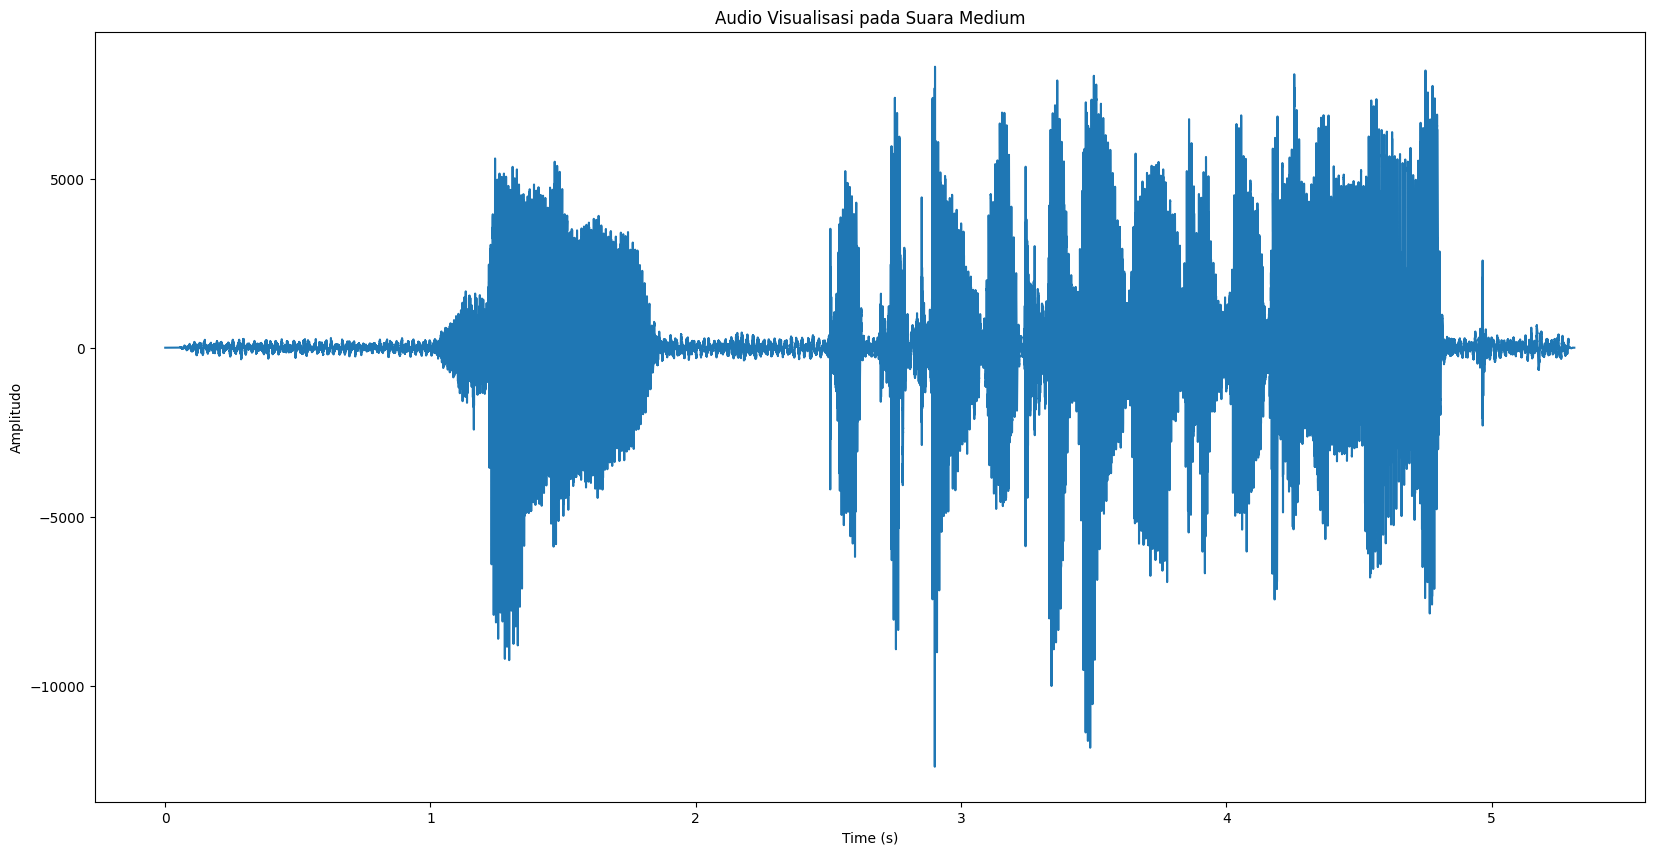

In [41]:
time_axis = np.linspace(0, len(sound_data) / sampling_rates, num=len(sound_data))

plt.figure(figsize=(20, 10))
plt.title("Audio Visualisasi pada Suara Medium")
plt.plot(time_axis, sound_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitudo")
plt.show()

## Description
You probably wondering what is this also both for the code and for the graph. let's break it down

Kita mencatat time_interval dari audio berikut dengan cara sederhana, ingat bahwasannya `time_axis` ini satuannya unit sampling, bukan detik.
$$
    \text{time length} = \frac{\text{length of sound data}}{\text{sampling rates}}
$$

Maka jika ingin mendapatkan properti audio pada detik k-n, Tinggal di kali saja, sampling rates dengan time lengthnya.

Disini, kita menggunakan `matpotlib` sebagai package untuk menggambar grafik dari fungsi gelombang suara kali ini. 

Data pada detik ke-1 sampai 1.05


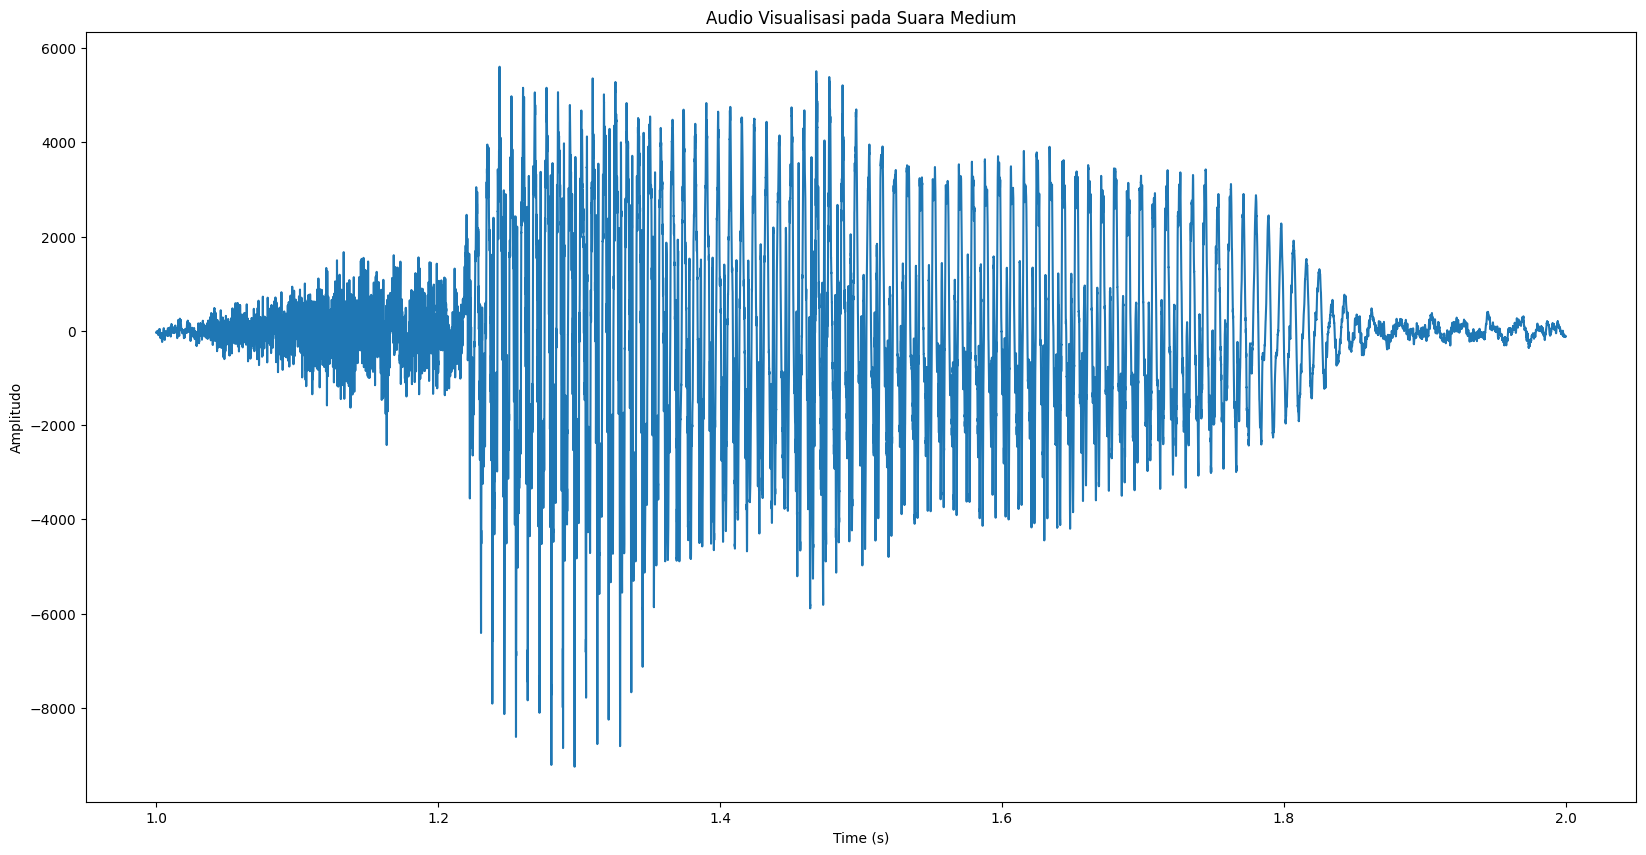

In [42]:
print("Data pada detik ke-1 sampai 1.05")
plt.figure(figsize=(20, 10))
plt.title("Audio Visualisasi pada Suara Medium")

## Representative audio pada detik ke 1 = 1 * 44100 dan detik ke 2 = 2 * 44100 = 88200
plt.plot(time_axis[44100:88200], sound_data[44100:88200]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitudo")
plt.show()

Anda pasti berfikir, apa maskud masing-masing nilai pada grafik satu ini, di satu sisi bernilai positif dan negatif. Sederhannaya, nilai tersebut adalah nilai tekanan di udara yang sudah di konversi list bilangan melalui ADC (Analog to Digital Converter).

Kalian juga pasti berfikir, apa hubungannya tekanan udara dalam proses pemrosesan audio secara digital? Cukup contrast dengan pemrosesan citra, dimana kita menggunakan nilai `int8` (0 - 255) sebagai nilai untuk warna RGB. Untuk pemrosesan audio sendiri, nilai ini nanti akan digunakan sebagai arus listrik untuk menentukan bagaimana suara tersebut di buat oleh speaker / earphone yang kalian pakai (nilai negatif / positif merupakan nilai tekanan / refaksi pada speaker kalian untuk membuat sebuah suara, I don't even know about this stuff). Mungkin Pak Martin bisa melakukan koreksi disini.

Lalu, amplitudo sendiri merupakan satuan yang menentukan kurang lebih kerasnya suara. Semakin jauh sebuah nilai dari titik `equilibrium` (0) maka suara tersebut akan semakin besar.

Lihat hasil saya riset saya [disini](https://chatgpt.com/c/66ee2145-8bf0-8007-8b2d-b729cd99c113)

## Penggunaan Mel Spectogram

Spectogram merupkaan sebuah alat untuk melihat representasi visual dari spektrum frekuensi audio, kita menggunakan spectogram agar lebih mudah dipahami oleh manusia. Kita dapat menggunakana library `librosa` untuk dapat membuat Mel Spektogram

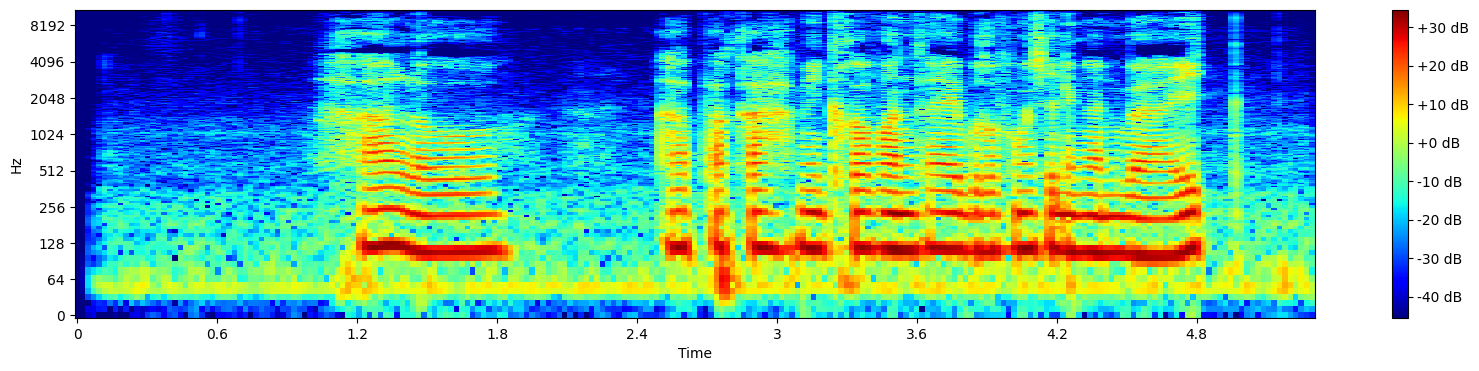

In [43]:
import librosa
import librosa.display

file_path = os.path.join(os.getcwd(), "attachment", "audio2-medium-volume.wav")

data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.show()

## Description
Pada Mel spectrogram:
- **Sumbu X**: Menunjukkan waktu.
- **Sumbu Y**: Menunjukkan frekuensi dalam skala Mel.
- **Warna**: Menunjukkan amplitudo atau kekuatan sinyal pada frekuensi dan waktu tertentu, diukur dalam dB (decibel).

Mel spektogram memberikan representasi yang lebih jelas mengenani spektrum didistribusikan sesuai dengan pendengaran manusia, Ini cukup membantu untuk menganalisis pola suara dan nada.